# Homework 4

## Name: Aishwarya Donegiri
## USC ID: 4640782493

## 1. The LASSO and Boosting for Regression

### (a) The Communities and Crime dataset 

In [1]:
import pandas as pd
import numpy as np

## Getting the column names

In [2]:
attributes=(pd.read_excel("../data/columns.xlsx",header=None)).to_numpy().reshape(-1)
columns=[]
for attribute in attributes:
    columns.append(attribute.split(":")[0])
print ("Column names :\n",columns)

Column names :
 ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',

In [3]:
columns=['state', 'county', 'community', 'communityname', 'fold','population', 'householdsize', 'racepctblack', 
         'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21','agePct12t29', 'agePct16t24', 'agePct65up', 
         'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
         'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 
         'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 
         'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 
         'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 
         'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 
         'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 
         'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 
         'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 
         'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 
         'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 
         'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 
         'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 
         'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 
         'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
         'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 
         'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 
         'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 
         'PolicBudgPerPop', 'ViolentCrimesPerPop']

dataset=pd.read_csv("../data/communities.csv",names=columns)
dataset

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


### Splitting the train and test data

In [4]:
X=dataset.iloc[:,:-1]
X

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,?,0.01,0.28,0.05,?,?,?,?,0.00,?
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,?,0.02,0.37,0.20,?,?,?,?,0.00,?
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [5]:
y=dataset.iloc[:,-1]
y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1495, shuffle=False)
# X_train=X.iloc[:1495,:]
X_train

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,?,?,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,?,0.02,0.14,0.22,?,?,?,?,0.00,?
1491,6,?,?,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.38,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19
1492,13,?,?,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,?,0.03,0.12,0.01,?,?,?,?,0.00,?
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,?,0.08,0.15,0.02,?,?,?,?,0.00,?


In [7]:
# y_train=y.iloc[:1495]
y_train

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1490    0.03
1491    0.20
1492    0.30
1493    0.03
1494    0.23
Name: ViolentCrimesPerPop, Length: 1495, dtype: float64

In [8]:
# X_test=X.iloc[1495:,:]
X_test

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
1495,6,?,?,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,?,0.01,0.23,0.73,?,?,?,?,0.00,?
1496,48,?,?,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,?,0.01,0.18,0.02,?,?,?,?,0.00,?
1497,35,?,?,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,?,0.01,0.18,0.00,?,?,?,?,0.00,?
1498,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,?,0.06,0.13,0.16,?,?,?,?,0.00,?
1499,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,?,0.03,0.23,0.06,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,?,0.01,0.28,0.05,?,?,?,?,0.00,?
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,?,0.02,0.37,0.20,?,?,?,?,0.00,?
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [9]:
# y_test=y.iloc[1495:]
y_test

1495    0.12
1496    0.11
1497    0.12
1498    0.06
1499    0.12
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 499, dtype: float64

In [10]:
# train_data=dataset.iloc[:1495,5:]
# train_data

In [11]:
# test_data=dataset.iloc[1495:,5:]
# test_data

### (b) Data Imputation

### Removing non-predictive features

In [12]:
X_train=X_train.loc[:,columns[5:-1]]
X_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,?,0.02,0.14,0.22,?,?,?,?,0.00,?
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.38,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,?,0.03,0.12,0.01,?,?,?,?,0.00,?
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,?,0.08,0.15,0.02,?,?,?,?,0.00,?


In [13]:
X_test=X_test.loc[:,columns[5:-1]]
X_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,?,0.01,0.23,0.73,?,?,?,?,0.00,?
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,?,0.01,0.18,0.02,?,?,?,?,0.00,?
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,?,0.01,0.18,0.00,?,?,?,?,0.00,?
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,?,0.06,0.13,0.16,?,?,?,?,0.00,?
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,?,0.03,0.23,0.06,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,?,0.01,0.28,0.05,?,?,?,?,0.00,?
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,?,0.02,0.37,0.20,?,?,?,?,0.00,?
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


### Performing Data Imputation using mean values

In [14]:
from sklearn.impute import SimpleImputer
imputer_train=SimpleImputer(missing_values=np.nan)
X_train.replace('?',np.nan,inplace=True)
X_train_imputed=imputer_train.fit_transform(X_train)
X_train_imputed=pd.DataFrame(X_train_imputed,columns=columns[5:-1])
print ("Output after performing Data imputation with mean on train data :")
X_train_imputed

Output after performing Data imputation with mean on train data :


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


In [15]:
X_test.replace('?',np.nan,inplace=True)
X_test_imputed=imputer_train.transform(X_test)
X_test_imputed=pd.DataFrame(X_test_imputed,columns=columns[5:-1])
print ("Output after performing Data imputation with mean on test data :")
X_test_imputed

Output after performing Data imputation with mean on test data :


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.323598,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.323598,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.323598,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.323598,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.323598,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.323598,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.323598,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.250000,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.190000,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000


### Imputation on the whole dataset

In [16]:
dataset_=dataset.iloc[:,5:].replace('?',np.nan)
imputer=SimpleImputer(missing_values=np.nan)
dataset_imputed=imputer.fit_transform(dataset_)
dataset_imputed=pd.DataFrame(dataset_imputed,columns=columns[5:])
# print ("Output after performing Data imputation with mean on train data :")
dataset_imputed

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


### (c) Correlation matrix

In [17]:
corr_train=X_train_imputed.corr()
print ("Correlation matric of train data :")
corr_train

Correlation matric of train data :


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.040404,0.242144,-0.306023,0.168868,0.162282,0.014554,0.128721,0.075744,-0.107060,...,0.125115,0.747424,0.235510,0.283682,0.630778,0.591778,-0.063029,0.041216,0.464459,-0.011305
householdsize,-0.040404,1.000000,-0.068374,-0.243565,0.209848,0.473320,0.517742,0.371658,0.301949,-0.606714,...,0.031750,-0.020832,-0.003807,-0.030652,-0.014900,0.004813,-0.024445,0.008771,-0.086315,-0.021276
racepctblack,0.242144,-0.068374,1.000000,-0.793431,-0.104912,-0.069449,0.118272,0.143406,0.125330,0.056381,...,-0.069725,0.155017,0.101270,0.169002,0.142543,0.104193,-0.113466,0.022226,0.257781,0.042346
racePctWhite,-0.306023,-0.243565,-0.793431,1.000000,-0.270829,-0.436737,-0.189135,-0.258390,-0.175195,0.138619,...,-0.017046,-0.147054,-0.339787,-0.234460,-0.131432,-0.126551,0.077626,-0.048890,-0.272366,-0.029339
racePctAsian,0.168868,0.209848,-0.104912,-0.270829,1.000000,0.264600,-0.017945,0.106958,0.056442,-0.283709,...,0.153146,0.004790,0.360708,0.274826,-0.023657,0.044584,0.031598,0.050863,0.100653,-0.004045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.591778,0.004813,0.104193,-0.126551,0.044584,0.071164,-0.009618,0.017201,0.002304,-0.031643,...,0.104500,0.429176,0.138857,0.180796,0.836614,1.000000,-0.070216,-0.013583,-0.068059,0.297196
LemasPctPolicOnPatr,-0.063029,-0.024445,-0.113466,0.077626,0.031598,0.018398,-0.025210,-0.008902,-0.006311,0.021422,...,0.017528,-0.067853,0.068739,0.028476,-0.118489,-0.070216,1.000000,-0.033617,0.032430,-0.187790
LemasGangUnitDeploy,0.041216,0.008771,0.022226,-0.048890,0.050863,0.048441,0.035629,0.016274,0.015603,-0.034216,...,0.123336,0.070956,-0.071059,-0.084771,0.008831,-0.013583,-0.033617,1.000000,-0.017356,-0.040769
LemasPctOfficDrugUn,0.464459,-0.086315,0.257781,-0.272366,0.100653,0.126210,0.012529,0.117998,0.083582,-0.022575,...,-0.013820,0.322885,0.236545,0.209710,-0.058210,-0.068059,0.032430,-0.017356,1.000000,0.017402


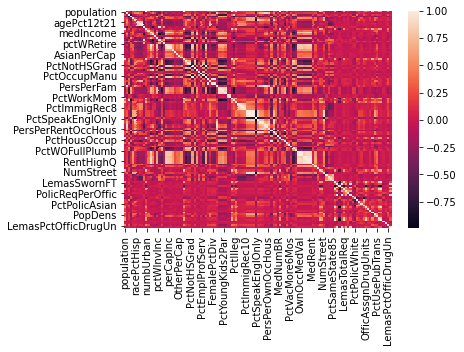

In [18]:
from seaborn import heatmap
import matplotlib.pyplot as plt
heatmap(corr_train)
plt.show()

In [19]:
corr_test=X_test_imputed.corr()
print ("Correlation matrix of test data :")
corr_test

Correlation matrix of test data :


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.065386,0.192372,-0.282014,0.225467,0.135724,-0.021150,0.137412,0.075623,-0.089080,...,-0.140219,0.631997,0.221436,0.224299,0.516757,0.540167,-0.205792,0.131351,0.476892,-0.049332
householdsize,-0.065386,1.000000,-0.063024,-0.211763,0.178287,0.455058,0.528305,0.353382,0.273764,-0.630803,...,0.086048,-0.001062,-0.004324,-0.115132,-0.091539,-0.045493,0.068317,-0.016451,-0.118520,-0.148531
racepctblack,0.192372,-0.063024,1.000000,-0.797841,-0.112666,-0.057375,0.135763,0.185757,0.162801,0.042668,...,-0.077871,0.137356,0.075896,0.075104,0.044387,-0.045191,-0.061782,-0.056941,0.270904,-0.005890
racePctWhite,-0.282014,-0.211763,-0.797841,1.000000,-0.269080,-0.469192,-0.211022,-0.295678,-0.213033,0.132769,...,0.040693,-0.089695,-0.331156,-0.152462,-0.023176,-0.023468,0.054609,0.053962,-0.289850,0.028358
racePctAsian,0.225467,0.178287,-0.112666,-0.269080,1.000000,0.273361,-0.046675,0.082269,0.041410,-0.240209,...,0.020050,-0.016477,0.475941,0.365812,-0.000912,0.153376,0.008225,0.098699,0.105520,-0.020648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.540167,-0.045493,-0.045191,-0.023468,0.153376,-0.003634,-0.050017,-0.019157,-0.026423,-0.010348,...,0.180334,0.284193,0.071672,0.100091,0.656605,1.000000,-0.166419,0.189126,-0.158104,0.155985
LemasPctPolicOnPatr,-0.205792,0.068317,-0.061782,0.054609,0.008225,0.006980,0.075554,0.048576,0.051540,-0.038315,...,0.035760,-0.142801,-0.036543,-0.056077,-0.107912,-0.166419,1.000000,0.122456,-0.203738,-0.345900
LemasGangUnitDeploy,0.131351,-0.016451,-0.056941,0.053962,0.098699,-0.062165,-0.064355,-0.040577,-0.062765,-0.070743,...,0.063456,0.182093,-0.121883,-0.108532,0.324543,0.189126,0.122456,1.000000,-0.104088,0.028350
LemasPctOfficDrugUn,0.476892,-0.118520,0.270904,-0.289850,0.105520,0.123135,-0.032246,0.114954,0.081947,0.025172,...,-0.376223,0.241661,0.204302,0.198704,-0.048254,-0.158104,-0.203738,-0.104088,1.000000,0.094698


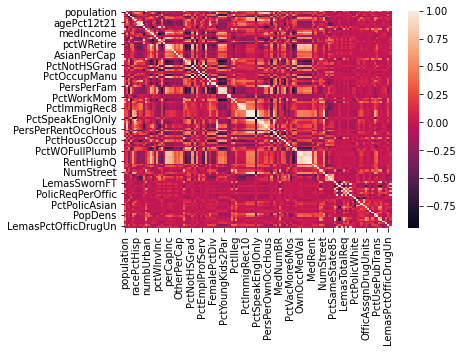

In [20]:
heatmap(corr_test)
plt.show()

In [21]:
corr_=dataset_imputed.corr()
print ("Correlation matrix of whole data :")
corr_

Correlation matrix of whole data :


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609147,0.595543,-0.061583,0.076527,0.466352,-0.035576,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032663,-0.007584,-0.006426,-0.000280,-0.094368,-0.054562,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.122017,0.083179,-0.082660,0.010987,0.260793,0.022237,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109191,-0.114860,0.052940,-0.033209,-0.276234,-0.006323,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.017992,0.067745,0.032389,0.065424,0.101888,-0.011619,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.061583,-0.006426,-0.082660,0.052940,0.032389,0.024366,0.000652,0.013327,0.013687,0.005601,...,-0.067678,0.055734,0.023457,-0.115349,-0.089736,1.000000,0.007179,0.021153,-0.237240,-0.039002
LemasGangUnitDeploy,0.076527,-0.000280,0.010987,-0.033209,0.065424,0.025956,0.011271,0.005145,-0.001001,-0.042756,...,0.109830,-0.076634,-0.082946,0.078436,0.023349,0.007179,1.000000,-0.015712,-0.021100,0.055038
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052426,-0.062677,0.021153,-0.015712,1.000000,0.018649,0.348627
PolicBudgPerPop,-0.035576,-0.054562,0.022237,-0.006323,-0.011619,0.002234,-0.076589,-0.068575,-0.049876,0.076586,...,-0.113166,0.067199,0.080024,0.245532,0.259342,-0.237240,-0.021100,0.018649,1.000000,0.045466


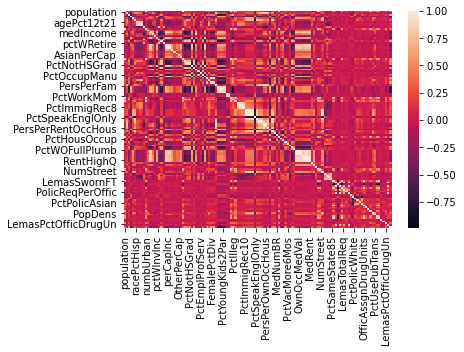

In [22]:
heatmap(corr_)
plt.show()

### (d) Coefficient of Variation for each feature

In [23]:
from scipy.stats import variation
print ("CV using variation function for all features")
pd.DataFrame({"Features":columns[5:-1],"Coeff. of Variation":variation(X_train_imputed)})

CV using variation function for all features


,Features,Coeff. of Variation
0,population,2.240355
1,householdsize,0.355681
2,racepctblack,1.428407
3,racePctWhite,0.330102
4,racePctAsian,1.358645
...,...,...
117,PolicOperBudg,0.743238
118,LemasPctPolicOnPatr,0.115700
119,LemasGangUnitDeploy,0.362868
120,LemasPctOfficDrugUn,2.552092


In [24]:
std=X_train_imputed.std()
std

population             0.130359
householdsize          0.164284
racepctblack           0.256970
racePctWhite           0.248594
racePctAsian           0.208910
                         ...   
PolicOperBudg          0.059852
LemasPctPolicOnPatr    0.082528
LemasGangUnitDeploy    0.164029
LemasPctOfficDrugUn    0.238201
PolicBudgPerPop        0.062190
Length: 122, dtype: float64

In [25]:
mean=X_train_imputed.mean()
mean

population             0.058167
householdsize          0.461732
racepctblack           0.179839
racePctWhite           0.752829
racePctAsian           0.153712
                         ...   
PolicOperBudg          0.080502
LemasPctPolicOnPatr    0.713054
LemasGangUnitDeploy    0.451883
LemasPctOfficDrugUn    0.093304
PolicBudgPerPop        0.190753
Length: 122, dtype: float64

In [26]:
cv=std/mean
print ("Calculating Coefficient of Variation by formula : ")
cv

Calculating Coefficient of Variation by formula : 


population             2.241105
householdsize          0.355800
racepctblack           1.428885
racePctWhite           0.330213
racePctAsian           1.359100
                         ...   
PolicOperBudg          0.743487
LemasPctPolicOnPatr    0.115739
LemasGangUnitDeploy    0.362989
LemasPctOfficDrugUn    2.552946
PolicBudgPerPop        0.326026
Length: 122, dtype: float64

### CV values using the whole dataset

In [27]:
print ("CV for all features using the whole dataset : ")
cv=pd.DataFrame({"Features":columns[5:-1],"Coeff. of Variation":variation(dataset_imputed.iloc[:,:-1])})
cv

CV for all features using the whole dataset : 


,Features,Coeff. of Variation
0,population,2.202950
1,householdsize,0.353210
2,racepctblack,1.410567
3,racePctWhite,0.323700
4,racePctAsian,1.358821
...,...,...
117,PolicOperBudg,0.729924
118,LemasPctPolicOnPatr,0.122301
119,LemasGangUnitDeploy,0.367948
120,LemasPctOfficDrugUn,2.554625


### (e) Scatter plots and Box plots for features with highest CV

In [28]:
no_of_features=np.floor(np.sqrt(128))
print ("The number of features to be selected :")
no_of_features

The number of features to be selected :


11.0

In [29]:
cv.sort_values(inplace=True,ascending=False,by="Coeff. of Variation")
features_highest_cv=list((cv.iloc[:11,:]).loc[:,'Features'])
print ("Selected features are : ")
features_highest_cv

Selected features are : 


['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp']

In [30]:
dataset_selected=dataset_imputed.loc[:,features_highest_cv]
print ("Data with selected features : ")
dataset_selected

Data with selected features : 


,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


Scatter plots for the selected features : 


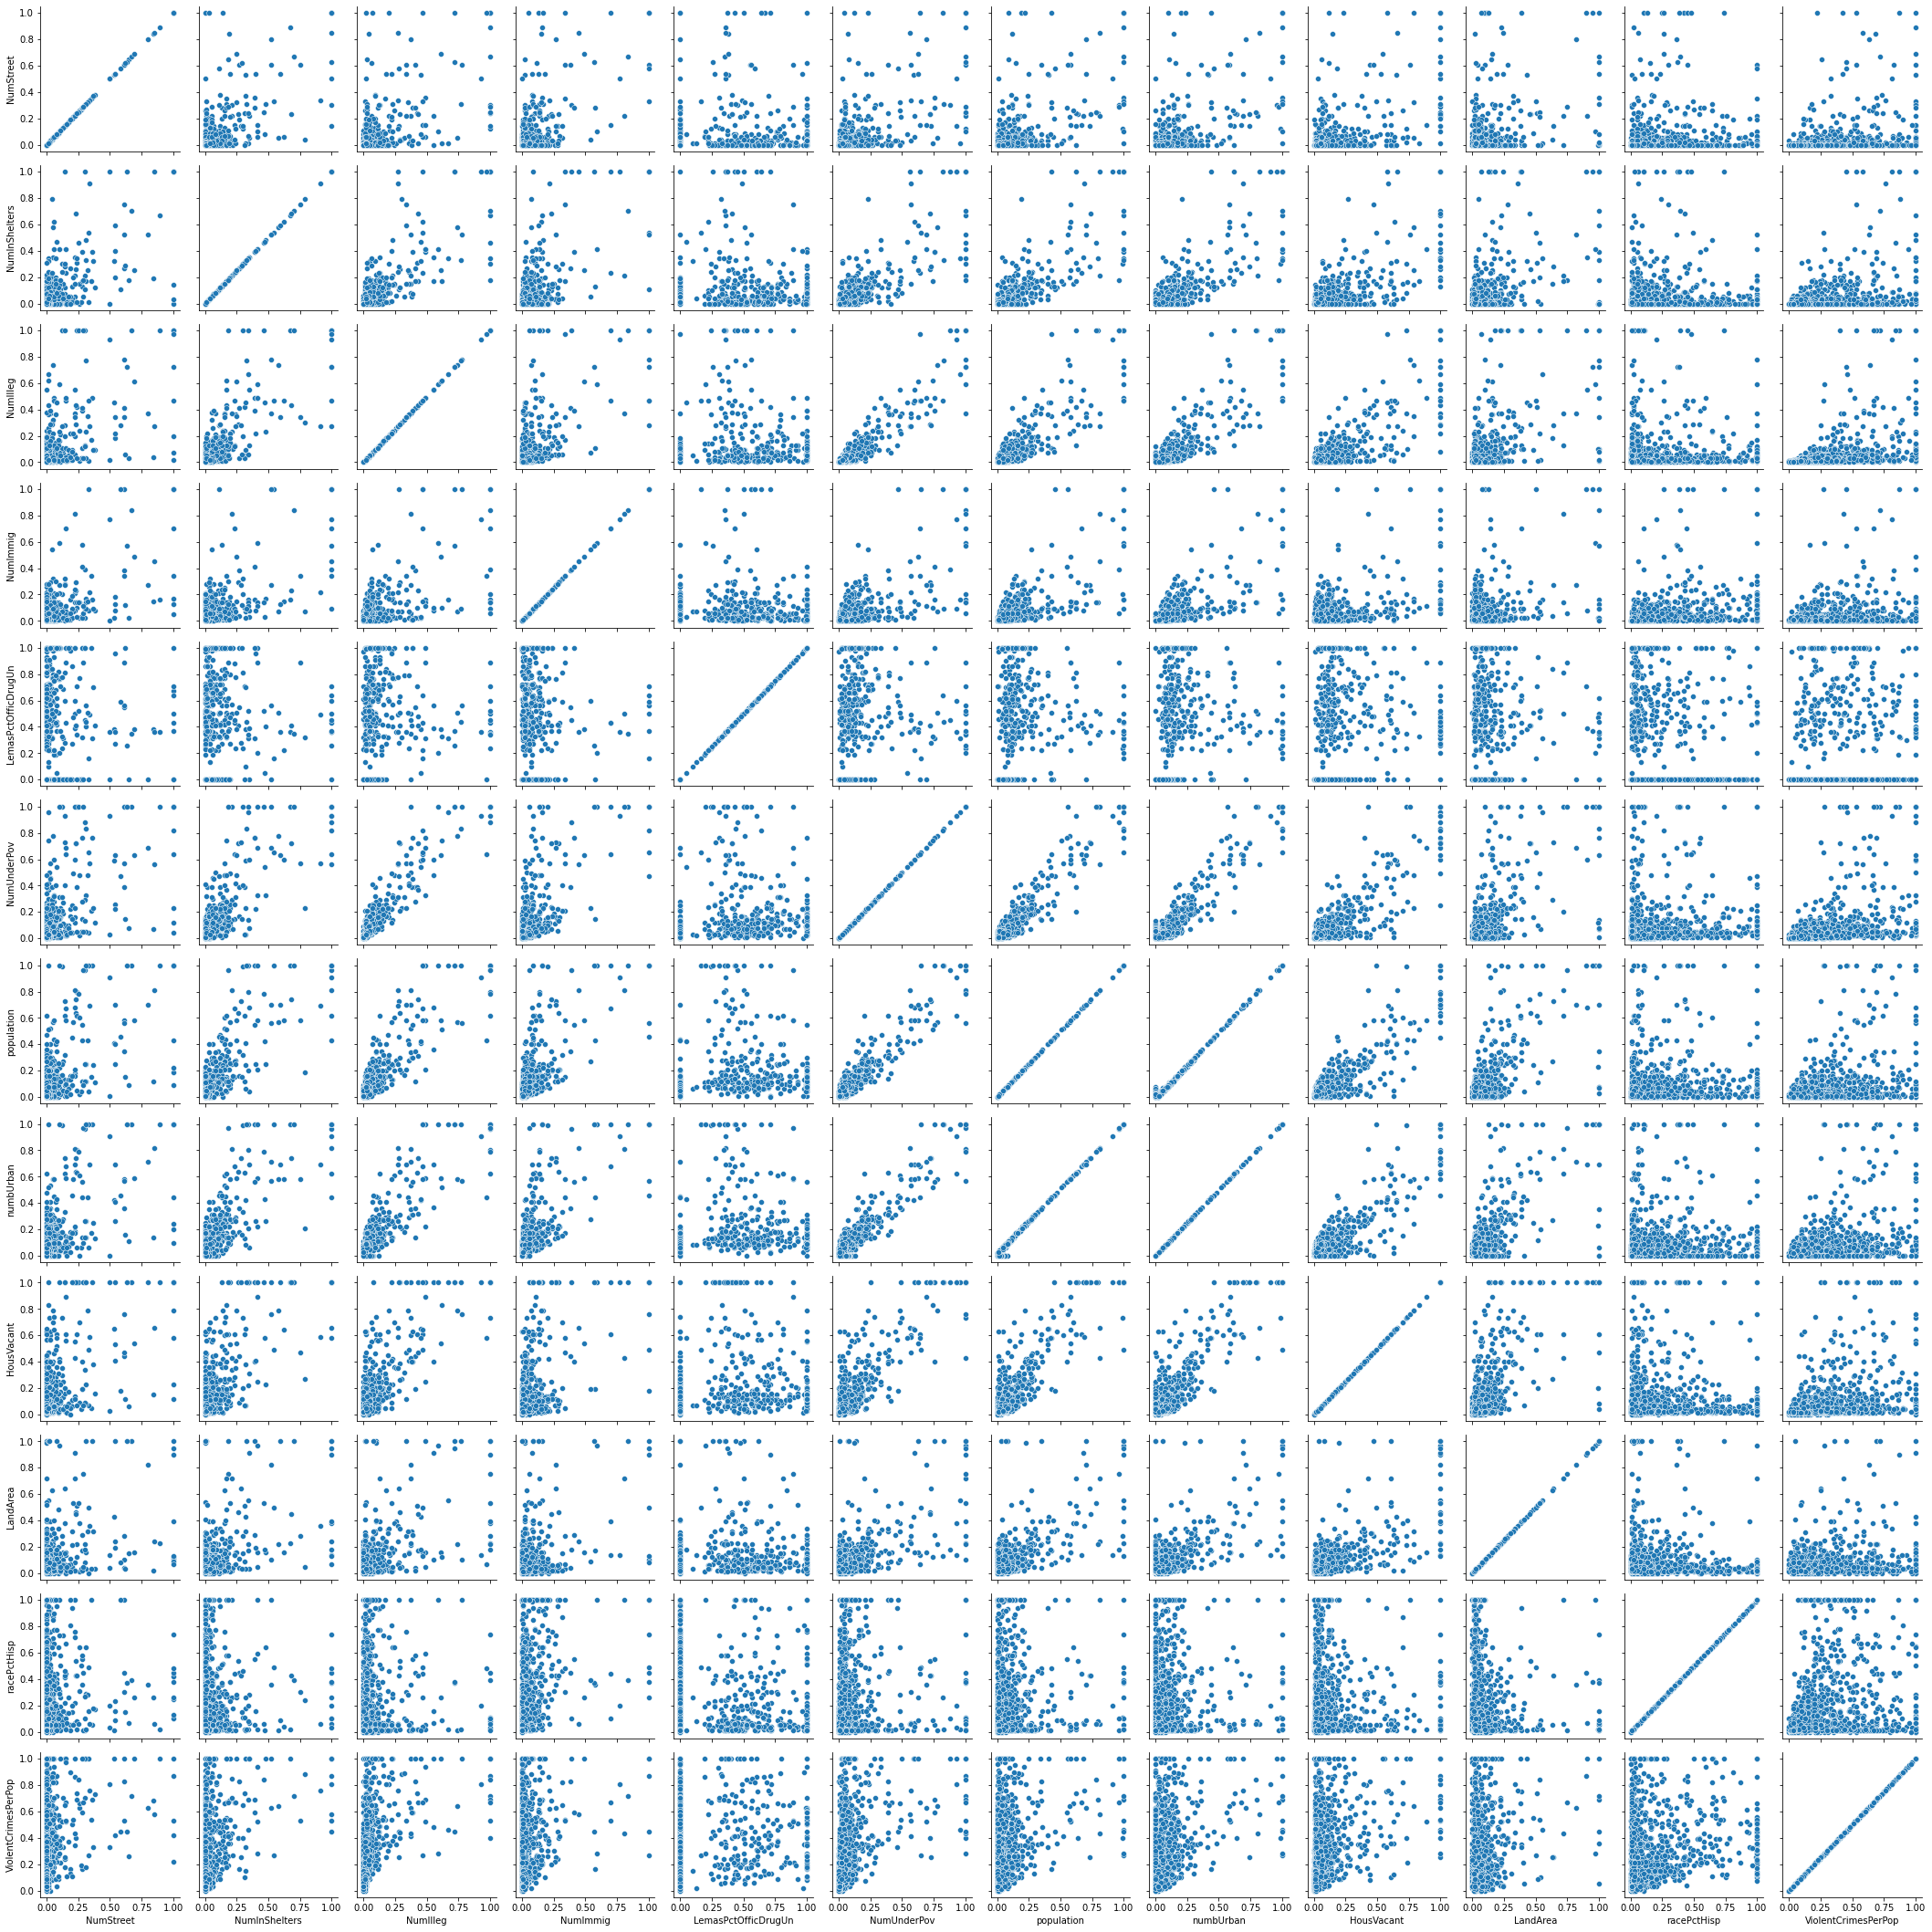

In [31]:
import seaborn as sns
g=sns.PairGrid(pd.concat([dataset_selected,y_train],axis=1))
print ("Scatter plots for the selected features : ")
g.map(sns.scatterplot)

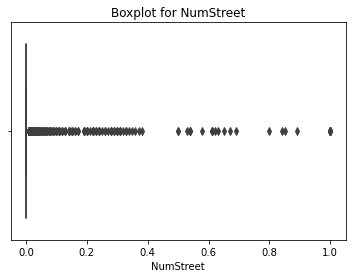

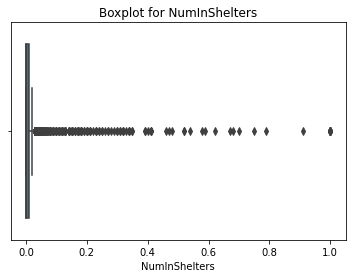

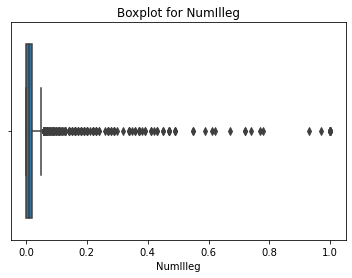

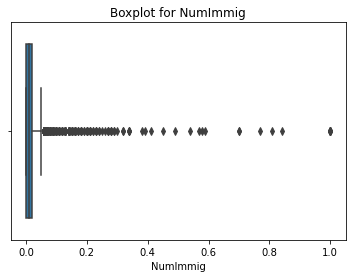

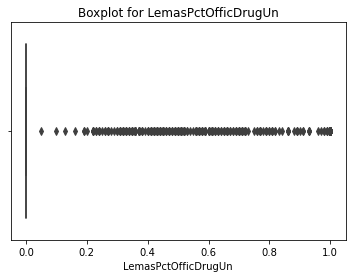

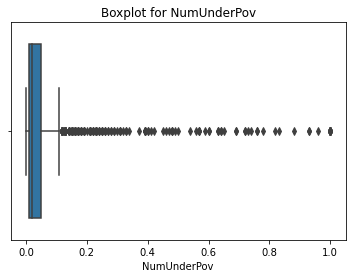

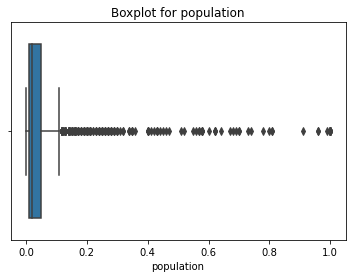

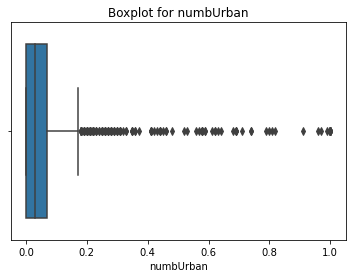

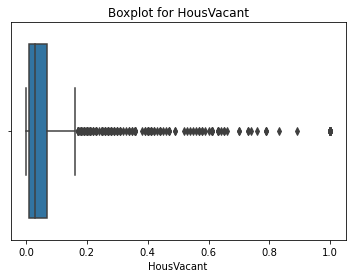

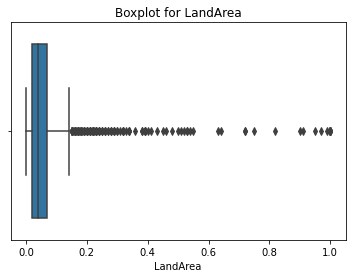

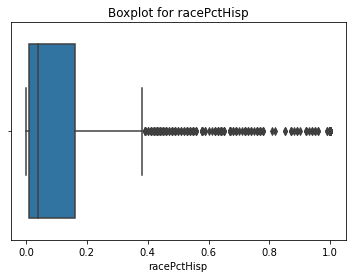

In [32]:
import matplotlib.pyplot as plt
for i in range(int(no_of_features)):
    sns.boxplot(x=dataset_selected.loc[:,features_highest_cv[i]]).set_title("Boxplot for "+features_highest_cv[i])
    plt.show()

No, we cannot draw conclusions about significance of features from the scatter plots alone but correlation between individual features and the output can be inferred.

### (f) Linear model using least squares

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
linear_regressor=LinearRegression()
linear_regressor.fit(X_train_imputed,y_train)
# linear_regressor.score(X_test_imputed,y_test)
y_pred=linear_regressor.predict(X_test_imputed)
mse_linear_regression=mean_squared_error(y_test,y_pred)
print("MSE for test data using Linear Regression : ",mse_linear_regression)
print ("Test error using score function : ",1-linear_regressor.score(X_test_imputed,y_test))

MSE for test data using Linear Regression :  5.814203320741234e+18
Test error using score function :  1.2226194030301797e+20


### (g) Ridge regression

In [35]:
from sklearn.linear_model import RidgeCV
alphas=10**np.linspace(10,-2,100)*0.5
ridge_regressor=RidgeCV(cv=5)
ridge_regressor.fit(X_train_imputed,y_train)
y_pred=ridge_regressor.predict(X_test_imputed)
test_error_ridge_regression=1-(ridge_regressor.score(X_test_imputed,y_test))
print ("Lambda : ",ridge_regressor.alpha_)
print ("Test error using Ridge Regression : ",test_error_ridge_regression)
print ("MSE for Ridge Regression : ",mean_squared_error(y_test,y_pred))

Lambda :  1.0
Test error using Ridge Regression :  0.37288114629088964
MSE for Ridge Regression :  0.01773247499289664


### (h) LASSO 

LASSO using normalised features

In [36]:
from sklearn.linear_model import LassoCV

lasso_regression=LassoCV(cv=5,max_iter=1500,n_jobs=-1)
lasso_regression.fit(X_train_imputed,y_train)
y_pred=lasso_regression.predict(X_test_imputed)
test_error_lasso_norm=1-lasso_regression.score(X_test_imputed,y_test)

print ("Lambda : ",lasso_regression.alpha_)
print ("Test error using LASSO with normalised features : ",test_error_lasso_norm)
print ("MSE : ",mean_squared_error(y_test,y_pred))

Lambda :  0.00011614723626829846
Test error using LASSO with normalised features :  0.37342228940445554
MSE :  0.017758209216319674


In [54]:
betas=list(lasso_regression.coef_)
cols=columns[5:-1]

selected=[]
for i in range(len(cols)):
    if betas[i]!=0:
        selected.append(cols[i])
print ("Selected features are : \n")
print (selected)

Selected features are : 

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameCity85', 'LemasSwFT

In [37]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train_imputed,y_train)
X_test_std=scaler.transform(X_test_imputed)
lasso_regression_std=LassoCV(cv=5,max_iter=1500,n_jobs=-1)
lasso_regression_std.fit(X_train_std,y_train)
y_pred=lasso_regression_std.predict(X_test_std)
test_error_lasso_std=1-lasso_regression_std.score(X_test_std,y_test)

print ("Lambda : ",lasso_regression_std.alpha_)
print ("Test error using LASSO with standardised features : ",test_error_lasso_std)
print ("MSE : ",mean_squared_error(y_test,y_pred))

Lambda :  0.0007630833878262516
Test error using LASSO with standardised features :  0.37441334739308496
MSE :  0.01780533927686227


In [56]:
betas=list(lasso_regression_std.coef_)
cols=columns[5:-1]

selected=[]
for i in range(len(cols)):
    if betas[i]!=0:
        selected.append(cols[i])
print ("Selected features after standardization are : \n")
print (selected)

Selected features after standardization are : 

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalReq

Both the LASSO models have almost the same test error, with LASSO with standardised features, a little higher than LASSO with normalised features

### (i) PCR

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

### Finding the best M

In [39]:
m_range=range(1,len(X_train_imputed.columns)+1)
accuracy_pcr=[]
for m in m_range:
    pcr = make_pipeline(StandardScaler(), PCA(n_components=m), LinearRegression())
    pcr.fit(X_train_imputed, y_train)
    accuracy=cross_val_score(pcr,X_train_imputed,y_train,cv=5,n_jobs=-1).mean()
    accuracy_pcr.append(accuracy)
m_pcr=(pd.Series(m_range).loc[np.argmax(accuracy_pcr)])
print ("Ideal m : ",m_pcr)
print ("Train Accuracy : ",max(accuracy_pcr))

Ideal m :  95
Train Accuracy :  0.65767274394695


### Finding the test error

In [40]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=m_pcr), LinearRegression())
pcr.fit(X_train_imputed, y_train)
y_pred=pcr.predict(X_test_imputed)
test_error_pcr=1-pcr.score(X_test_imputed,y_test)
print ("Test error for PCR : ",test_error_pcr)
print ("MSE : ",mean_squared_error(y_test,y_pred))

Test error for PCR :  0.3868131706948046
MSE :  0.01839501660112835


### (j) L1-penalised gradient Boosting tree

In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
reg_alphas = 10**np.linspace(10,-2,100)*0.5
xgboost_regressor=XGBRegressor()
grid_search_cv=GridSearchCV(xgboost_regressor,param_grid={'reg_alpha': reg_alphas},n_jobs=-1,cv=5)
grid_search_cv.fit(X_train_imputed,y_train)
alpha_xgb=grid_search_cv.best_params_['reg_alpha']
print ("Alpha : ",alpha_xgb)
print ("Accuracy using score : ",grid_search_cv.best_score_)

Alpha :  4.055654153948428
Accuracy using score :  0.6327191954013313


In [43]:
xgboost_regressor=XGBRegressor()
xgboost_regressor.fit(X_train_imputed,y_train)
y_pred=xgboost_regressor.predict(X_test_imputed)
test_error_xgb=1-xgboost_regressor.score(X_test_imputed,y_test)
print ("Test error using score : ",test_error_xgb)
print ("MSE : ",mean_squared_error(y_test,y_pred))

Test error using score :  0.3894158186569445
MSE :  0.01851878630727476
